In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()
original = pd.read_csv('../../data/algae.csv', index_col='date', sep=',', decimal='.', parse_dates=True, infer_datetime_format=True)

sb_vars = original.select_dtypes(include='object')
original[sb_vars.columns] = original.select_dtypes(['object']).apply(lambda x: x.astype('category'))

cols_nr = original.select_dtypes(include='number')
cols_sb = original.select_dtypes(include='category')

original.describe(include='all')

#Has missing values (counts), need to be filled in

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,198.000000,188.000000,200,200,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,medium,winter
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,84,62
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011,NaN,NaN,NaN
std,0.598302,2.391253,46.830993,3.776458,180.011207,116.783165,102.214088,20.448323,NaN,NaN,NaN
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000,NaN,NaN,NaN
25%,7.700000,7.725000,10.985000,1.297500,35.625000,16.000000,19.395000,2.000000,NaN,NaN,NaN
50%,8.060000,9.800000,32.730000,2.675000,99.665000,41.400000,84.500000,5.200000,NaN,NaN,NaN
75%,8.400000,10.800000,57.825000,4.447500,203.730000,102.247500,182.160000,18.300000,NaN,NaN,NaN


In [7]:
original.isna().sum()

pH                 1
Oxygen             2
Chloride          10
Nitrates           2
Ammonium           2
Orthophosphate     2
Phosphate          2
Chlorophyll       12
fluid_velocity     0
river_depth        0
season             0
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value='NA', missing_values=np.nan, copy=True)
imp.fit(original.values)
mat = imp.transform(original.values)
data = pd.DataFrame(mat, columns=original.columns)
data.describe(include='all')

#replaces missing values with numerical ones but fuckes up the mean, std, min etc

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
count,200.0,200.0,200,200.00,200.0,200.0,200.0,200,200,200,200
unique,72.0,89.0,179,162.00,179.0,175.0,188.0,131,3,3,4
top,8.3,9.8,NA,1.72,10.0,1.0,6.0,NA,high,medium,winter
freq,14.0,8.0,10,3.00,9.0,5.0,4.0,12,84,84,62


In [4]:
imp_nr = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
imp_sb = SimpleImputer(strategy='most_frequent', missing_values='', copy=True)
df_nr = pd.DataFrame(imp_nr.fit_transform(cols_nr), columns=cols_nr.columns)
df_sb = pd.DataFrame(imp_sb.fit_transform(cols_sb), columns=cols_sb.columns)

data = df_nr.join(df_sb, how='right')
data.describe(include='all')

#no missing values anymore (count)

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200,200,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,medium,winter
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,84,62
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011,NaN,NaN,NaN
std,0.596797,2.379206,45.639169,3.757432,179.104344,116.194833,101.699153,19.822204,NaN,NaN,NaN
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000,NaN,NaN,NaN
25%,7.700000,7.775000,11.067500,1.312500,36.875000,16.000000,20.185000,2.000000,NaN,NaN,NaN
50%,8.055000,9.800000,36.000000,2.740000,101.125000,43.085000,85.200000,5.550000,NaN,NaN,NaN
75%,8.400000,10.800000,56.977500,4.422500,199.850000,102.082500,179.140000,17.200000,NaN,NaN,NaN


In [5]:
data.isna().sum()

pH                0
Oxygen            0
Chloride          0
Nitrates          0
Ammonium          0
Orthophosphate    0
Phosphate         0
Chlorophyll       0
fluid_velocity    0
river_depth       0
season            0
dtype: int64

# normalization

In [8]:
from sklearn.preprocessing import Normalizer

In [9]:
transf = Normalizer().fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr, copy=True), columns= df_nr.columns)
norm_data = df_nr.join(df_sb, how='right')
norm_data.describe(include='all')

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200,200,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,medium,winter
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,84,62
mean,0.082241,0.104437,0.221043,0.022083,0.587137,0.299595,0.490879,0.076935,NaN,NaN,NaN
std,0.097797,0.132541,0.199691,0.035132,0.247992,0.210457,0.258793,0.108950,NaN,NaN,NaN
min,0.007915,0.003339,0.006633,0.000290,0.087508,0.014230,0.002641,0.000000,NaN,NaN,NaN
25%,0.024631,0.022504,0.091531,0.008413,0.410054,0.140260,0.286563,0.014384,NaN,NaN,NaN
50%,0.043089,0.042227,0.149779,0.014340,0.586529,0.268944,0.538332,0.030744,NaN,NaN,NaN
75%,0.093163,0.124953,0.265252,0.025148,0.775696,0.415019,0.710805,0.095915,NaN,NaN,NaN


# Dummification

#### Change classes with 'high, medium, low' to new variables v_high, v_medium v_low with binary classification

In [10]:
from sklearn.preprocessing import OneHotEncoder

def dummify(df, cols_to_dummify):
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    for var in cols_to_dummify:
        one_hot_encoder.fit(data[var].values.reshape(-1, 1))
        feature_names = one_hot_encoder.get_feature_names([var])
        transformed_data = one_hot_encoder.transform(data[var].values.reshape(-1, 1))
        df = pd.concat((df, pd.DataFrame(transformed_data, columns=feature_names)), 1)
        df.pop(var)
    return df
  
df = dummify(data, cols_sb.columns)
df.describe(include='all')

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity_high,fluid_velocity_low,fluid_velocity_medium,river_depth_high,river_depth_low,river_depth_medium,season_autumn,season_spring,season_summer,season_winter
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011,0.420000,0.165000,0.415000,0.22500,0.355000,0.420000,0.200000,0.265000,0.22500,0.310000
std,0.596797,2.379206,45.639169,3.757432,179.104344,116.194833,101.699153,19.822204,0.494797,0.372112,0.493958,0.41863,0.479714,0.494797,0.401004,0.442441,0.41863,0.463654
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.700000,7.775000,11.067500,1.312500,36.875000,16.000000,20.185000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,8.055000,9.800000,36.000000,2.740000,101.125000,43.085000,85.200000,5.550000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,8.400000,10.800000,56.977500,4.422500,199.850000,102.082500,179.140000,17.200000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000
max,9.700000,13.400000,391.500000,45.650000,931.830000,771.600000,558.750000,110.460000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Data Balancing

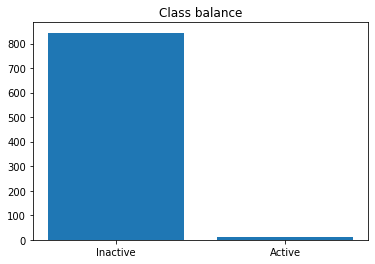

Minority class: 12
Majority class: 844
Proportion: 0.01 : 1


In [14]:
import matplotlib.pyplot as plt

unbal = pd.read_csv('../../data/unbalanced.csv', sep=',', decimal='.')
target_count = unbal['Outcome'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')